# Seating Charts with Social Network Analysis using NetworkX

I got married recently - and as part of the planning came deciding on a seating chart for the reception. Since I'm a Data Scientist, I naturally thought - there has to be a way I can apply Data Science methods to help solve this problem.

In this notebook, I'm exploring the connections of my 24 wedding guests using Social Network Analysis with the python package `NetworkX`.

In [1]:
#import packages
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
print(nx.__version__) # built using version 2.1

2.1


### Creating a Network Graph

The first step to creating a network graph is the underlying data. Each row of the data represents a connection between two people, the 'target' and 'source columns. The strength of the relationship is categorized in the 'weight' column. Network Analysis represents data as _nodes_ and _edges_. In my data set, each node is a person and an edge is a relationship between those two people. 

After the data is imported into a pandas dataframe, it can be transformed into the correct data representation for the NetworkX package using the function `from_pandas_edgelist()`. 

In [84]:
#Import CSV
df = pd.read_csv('guests.csv')
df.sample(n=10).head(10)

,target,source,weight
59,Ian,Rose,2
4,Kirsty,Ian,3
74,Paul,Joseph,3
102,Dave,Kent,3
65,Jane,Joseph,3
55,Ian,Paul,3
125,Carole,Ann,3
113,Rose,Beth,3
11,Kirsty,McLeod,3
122,Steve,Carole,6


In [87]:
#Create network edgelist from pandas dataframe
G = nx.from_pandas_edgelist(df, create_using=Graphtype, edge_attr='weight')
msg = 'The NetworkX graph has {} nodes (people) and {} edges (relationships).'.format(G.number_of_nodes(), G.number_of_edges())
print(msg)

The NetworkX graph has 24 nodes (people) and 127 edges (relationships).


### Visualizing the Network Graph

NetworkX has additional graph layout options available, found in the documentation here:
https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

#### Circular Layout

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


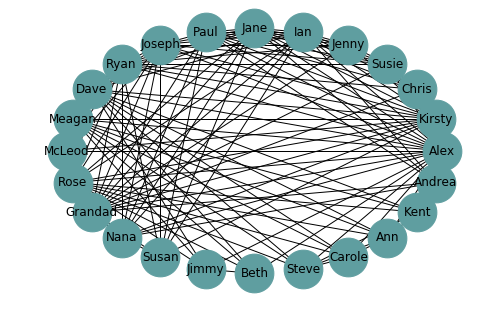

In [73]:
nx.draw(G, node_size = 1500, node_color = 'cadetblue', with_labels = True, pos=nx.circular_layout(G), edge_attr='weight')

#### Spring Layout

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


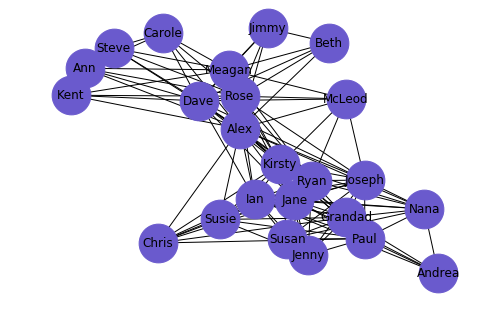

In [75]:
nx.draw(G, node_size = 1500, node_color = 'slateblue', with_labels = True, pos=nx.spring_layout(G), edge_attr='weight')

#### Kamada Kawai Layout

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


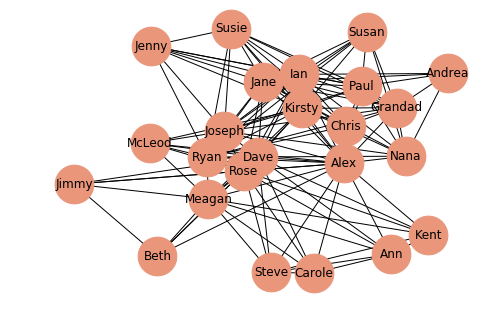

In [76]:
nx.draw(G, node_size = 1500, node_color = 'darksalmon', with_labels = True, pos=nx.kamada_kawai_layout(G), edge_attr='weight')

## Exploring Graph Data

Now that we have a visual way of looking at the connections in this data, we can explore the data further using algorithms in the NetworkX package.

#### Common Neighbors
Common Neighbors returns a list of other nodes that two nodes in a graph both have edges with. It's like were asking "Who do you both know?"

For example, if I knew that I wanted Meagan and Joseph to sit at the same table, I could look up their common neighbors to decide who else could be at the table:

In [86]:
neighbors = nx.common_neighbors(G=G, u='Meagan', v='Joseph')

for neighbor in neighbors :
    print(neighbor)

Kirsty
Alex
Ryan
Dave
McLeod
Rose


#### Triangles

`nx.triangles()` finds the number of triangles that include a node as one vertex. In other words, it is the number of three-person groups, where all people in that group are connected together. 

In this context, someone with a higher # of triangles would be more flexible to seat, since they know more guests. It's no surprise here that the two people with the highest # of triangles are the Bride and Groom, Kirsty and Alex.

In [44]:
d = nx.triangles(G)

for w in sorted(d, key=d.get, reverse=True):
  print(w, d[w])

Alex 86
Kirsty 76
Ian 70
Jane 70
Ryan 66
Joseph 64
Grandad 59
Dave 55
Rose 55
Paul 49
Susie 41
Meagan 39
Nana 38
Chris 27
Jenny 27
Susan 27
McLeod 20
Steve 20
Ann 20
Carole 15
Kent 15
Jimmy 10
Beth 10
Andrea 10


## Community Detection Algorithms

NetworkX includes algorithms to determine the underlying community structure in your network graph.

#### Girvan Newman

In [23]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
communities = sorted(map(sorted, top_level_communities))
communities

[['Alex',
  'Ann',
  'Beth',
  'Carole',
  'Dave',
  'Jimmy',
  'Kent',
  'McLeod',
  'Meagan',
  'Rose',
  'Steve'],
 ['Andrea',
  'Chris',
  'Grandad',
  'Ian',
  'Jane',
  'Jenny',
  'Joseph',
  'Kirsty',
  'Nana',
  'Paul',
  'Ryan',
  'Susan',
  'Susie']]

In [48]:
import itertools

k = 4
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities)) 

(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'McLeod', 'Meagan', 'Rose', 'Steve'], ['Andrea', 'Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'])
(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'McLeod', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'], ['Andrea'])
(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'], ['McLeod'], ['Andrea'])


#### Asynchronous Fluid Communities

In [49]:
no_tables = 4
fluid_communities = community.asyn_fluidc(G, k = no_tables, max_iter=100)

for element in fluid_communities:
     print(element)

{'Joseph', 'McLeod', 'Ryan', 'Susan', 'Kirsty'}
{'Andrea', 'Jane', 'Nana'}
{'Rose', 'Steve', 'Ann', 'Alex', 'Kent', 'Jimmy', 'Dave', 'Carole', 'Beth', 'Meagan'}
{'Grandad', 'Jenny', 'Ian', 'Susie', 'Paul', 'Chris'}
